In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from MCForecastTools import MCSimulation

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Get the data on silver ticker
silver = yf.Ticker("SI=F")

In [3]:
silver_df = silver.history(period="1d", start="2000-01-01", end="2022-10-01").drop(columns=["Dividends","Stock Splits"])
silver_df.index.names =["timestamp"]
silver_df.columns = ["open","high","low","close","volumne"]
silver_df = pd.concat([silver_df], axis=1, keys=["AXG"])
silver_df

AXG                                         
                                open       high        low      close volumne
timestamp                                                                    
2000-08-30 00:00:00-04:00   4.950000   4.950000   4.895000   4.930000    2319
2000-08-31 00:00:00-04:00   4.920000   5.045000   4.920000   5.003000    1612
2000-09-01 00:00:00-04:00   5.035000   5.035000   4.985000   5.004000    1375
2000-09-05 00:00:00-04:00   4.990000   5.005000   4.975000   4.998000     856
2000-09-06 00:00:00-04:00   5.000000   5.000000   4.980000   4.983000     232
...                              ...        ...        ...        ...     ...
2022-09-26 00:00:00-04:00  18.730000  18.850000  18.406000  18.406000      94
2022-09-27 00:00:00-04:00  18.525000  18.525000  18.257000  18.257000      36
2022-09-28 00:00:00-04:00  18.475000  18.796000  18.469999  18.796000      77
2022-09-29 00:00:00-04:00  18.764999  18.764999  18.525000  18.611000     174
2022-09-30 00:00:00-04:00  18.844999  18.969999  18.825001  18.959999      10

[5543 rows x 5 columns]

<AxesSubplot:title={'center':'Silver Value'}, xlabel='Time', ylabel='Price'>

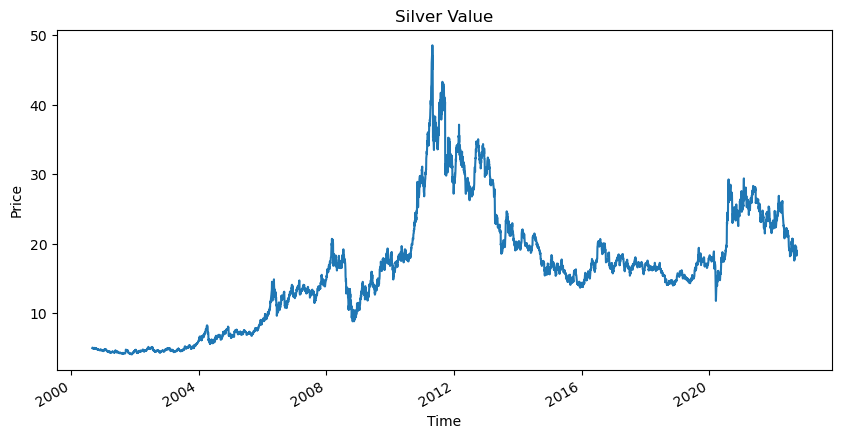

In [4]:
silver_df["AXG"]["close"].plot(title = "Silver Value", xlabel = "Time", ylabel = "Price", figsize = (10,5))

In [5]:
silver_df.head()

AXG                             
                            open   high    low  close volumne
timestamp                                                    
2000-08-30 00:00:00-04:00  4.950  4.950  4.895  4.930    2319
2000-08-31 00:00:00-04:00  4.920  5.045  4.920  5.003    1612
2000-09-01 00:00:00-04:00  5.035  5.035  4.985  5.004    1375
2000-09-05 00:00:00-04:00  4.990  5.005  4.975  4.998     856
2000-09-06 00:00:00-04:00  5.000  5.000  4.980  4.983     232

In [6]:
silver_df.tail()

AXG                                         
                                open       high        low      close volumne
timestamp                                                                    
2022-09-26 00:00:00-04:00  18.730000  18.850000  18.406000  18.406000      94
2022-09-27 00:00:00-04:00  18.525000  18.525000  18.257000  18.257000      36
2022-09-28 00:00:00-04:00  18.475000  18.796000  18.469999  18.796000      77
2022-09-29 00:00:00-04:00  18.764999  18.764999  18.525000  18.611000     174
2022-09-30 00:00:00-04:00  18.844999  18.969999  18.825001  18.959999      10

In [7]:
# Set number of simulations
num_sims = 1000

# Configure a Monte Carlo simulation to forecast three years daily returns
MC_AXG = MCSimulation(
    portfolio_data = silver_df,
    num_simulation = num_sims,
    num_trading_days = 252 * 5
)

In [8]:
# Run Monte Carlo simulations to forecast three years daily returns
MC_AXG.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.965319,1.033265,1.023639,1.007653,1.014832,1.015006,1.043712,1.022772,0.996701,1.006792,...,0.995040,1.005272,1.008917,1.006404,0.984186,1.009465,0.975471,1.026686,1.010132,1.007799
2,0.989271,1.036329,1.000906,1.028208,0.983161,1.009470,1.051297,1.006340,0.987465,0.998695,...,0.995439,1.015893,0.994455,0.961960,0.990072,0.995363,0.987022,1.016486,1.017335,1.003831
3,0.990957,1.043686,0.983886,1.021758,0.963863,1.012324,1.076970,1.018717,0.982849,1.007446,...,0.999358,1.011514,1.008014,0.978797,1.002161,0.989888,0.923093,1.002787,0.997142,0.997128
4,0.968400,1.058180,0.975015,0.994962,0.978042,1.012589,1.130538,1.039512,0.944459,1.024387,...,0.966679,1.030047,0.963576,0.938796,0.986384,0.981910,0.933251,1.005063,1.041793,1.005403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.877590,2.960590,2.021899,2.093634,2.892751,0.757933,4.264481,1.999625,3.126980,0.655365,...,0.968860,1.916054,0.985005,4.202827,0.978319,1.046378,5.413433,1.328422,1.120047,1.778316
1257,1.839435,2.915419,2.034466,2.013190,2.822267,0.771797,4.348590,2.016155,3.129575,0.639761,...,0.961827,1.901227,0.994036,4.119584,0.948356,1.042410,5.422196,1.303820,1.161250,1.777264
1258,1.823892,2.959303,2.025247,2.076919,2.886223,0.776413,4.393315,1.953834,3.336154,0.644575,...,0.973162,1.896672,1.004981,4.168877,0.944219,1.043822,5.418631,1.329853,1.097940,1.760766
1259,1.793372,2.915655,1.997551,2.071701,2.939409,0.770821,4.374325,1.943183,3.213698,0.636069,...,0.985469,1.855969,1.004922,4.103581,0.955656,1.047200,5.431243,1.321504,1.131099,1.787837


In [9]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_AXG.simulated_return.mean(axis=1)),
    "median": list(MC_AXG.simulated_return.median(axis=1)),
    "min": list(MC_AXG.simulated_return.min(axis=1)),
    "max": list(MC_AXG.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()



,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.001852,1.001810,0.927686,1.064207
2,1.002604,1.001740,0.906023,1.097495
3,1.003389,1.000609,0.891443,1.102245
4,1.004266,1.004066,0.863578,1.130538


<AxesSubplot:title={'center':'Simulated Daily Returns Behavior of AXG Value Over the Next Year'}>

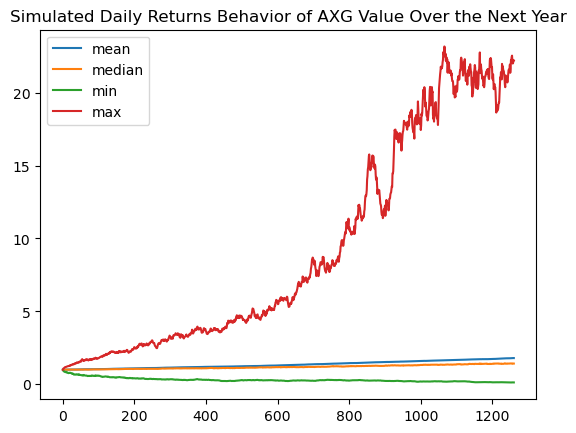

In [10]:
# Use the `plot` function to visually analyze the trajectory of AXG Value of daily returns on the next ten years of trading days simulation
df_simulated_returns.plot(title="Simulated Daily Returns Behavior of AXG Value Over the Next Year")

In [11]:
# Set initial investment
initial_investment = 350000

# Multiply an initial investment by the daily returns of simulative value prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl.head()

,mean,median,min,max
0,350000.000000,350000.000000,350000.000000,350000.000000
1,350648.286182,350633.540555,324690.096272,372472.478642
2,350911.402668,350609.001050,317107.982095,384123.251828
3,351186.286501,350212.988524,312005.139602,385785.826832
4,351493.187717,351423.020809,302252.236493,395688.180031


<AxesSubplot:title={'center':'Simulated Outcomes Behavior of AXG Value Over the Next Year'}>

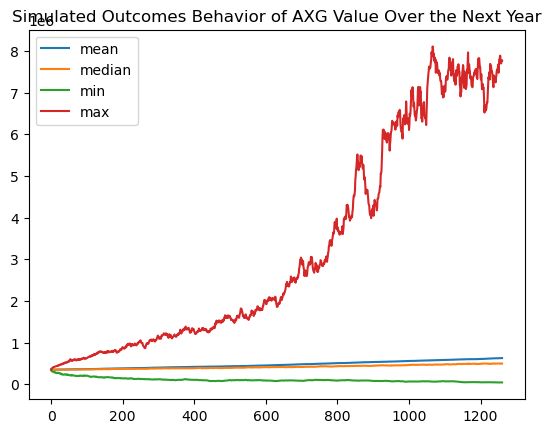

In [12]:
cumulative_pnl.plot(title="Simulated Outcomes Behavior of AXG Value Over the Next Year")

In [13]:
MC_AXG_sim_sum_stats = MC_AXG.summarize_cumulative_return()
display(MC_AXG_sim_sum_stats)

count           1000.000000
mean               1.798554
std                1.585196
min                0.128136
25%                0.869574
50%                1.422686
75%                2.298196
max               22.205749
95% CI Lower       0.362364
95% CI Upper       5.233294
Name: 1260, dtype: float64

In [16]:
MC_AXG_lower_thirty_cumu_return = MC_AXG_sim_sum_stats[8] * 350000
%store MC_AXG_lower_thirty_cumu_return
display(MC_AXG_lower_thirty_cumu_return)

Stored 'MC_AXG_lower_thirty_cumu_return' (float64)


126827.33174549445

In [17]:
MC_AXG_upper_thirty_cumu_return = MC_AXG_sim_sum_stats[9] * 350000
%store MC_AXG_upper_thirty_cumu_return
display(MC_AXG_upper_thirty_cumu_return)

Stored 'MC_AXG_upper_thirty_cumu_return' (float64)


1831652.7593167895